In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d yingyingkan/alexnet

100% 656M/656M [00:08<00:00, 87.5MB/s]
100% 656M/656M [00:08<00:00, 81.2MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile("/content/alexnet.zip")
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
valid=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
train=train.flow_from_directory(
    '/content/flower_data/train',
    target_size=(227,227),
    batch_size=16,
    class_mode='categorical'
)
valid=valid.flow_from_directory(
    '/content/flower_data/val',
    target_size=(227,227),
    batch_size=16,
    class_mode='categorical'
)

Found 3306 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [8]:
model=Sequential()

In [9]:
model.add(Conv2D(96,kernel_size=(11,11),padding='valid',strides=4,activation='relu',input_shape=(227,227,3)))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))
model.add(Conv2D(256,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))
model.add(Conv2D(384,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(384,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [13]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 6.1 MB/s eta 0:00:00


In [14]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show()

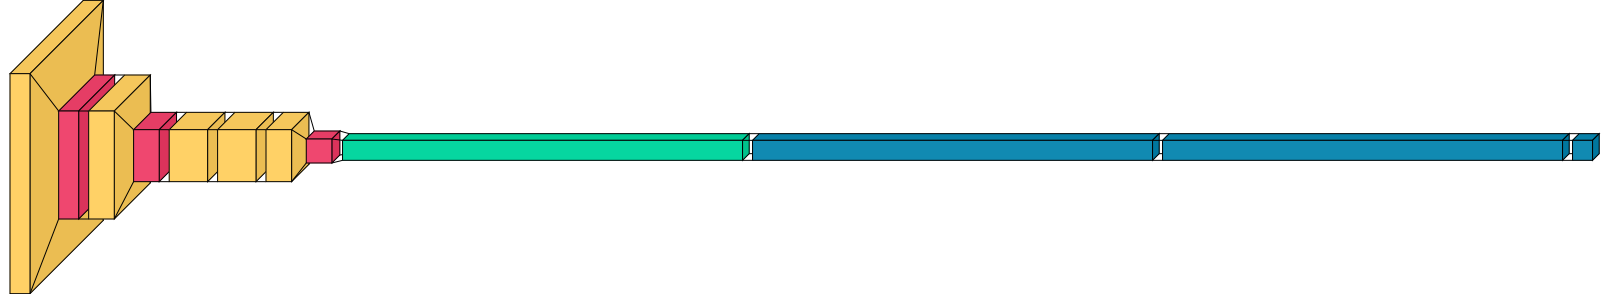

In [15]:
visualkeras.layered_view(model)

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [17]:
history=model.fit_generator(train,epochs=25,validation_data=valid)

<ipython-input-17-d0bb07b5ffc2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train,epochs=25,validation_data=valid)


Epoch 1/25
207/207 [==============================] - 72s 315ms/step - loss: 1.8553 - accuracy: 0.2371 - val_loss: 1.6018 - val_accuracy: 0.2445
Epoch 2/25
207/207 [==============================] - 63s 303ms/step - loss: 1.5460 - accuracy: 0.3312 - val_loss: 1.3700 - val_accuracy: 0.3462
Epoch 3/25
207/207 [==============================] - 55s 268ms/step - loss: 1.3561 - accuracy: 0.3956 - val_loss: 1.1612 - val_accuracy: 0.5577
Epoch 4/25
207/207 [==============================] - 55s 265ms/step - loss: 1.2230 - accuracy: 0.4991 - val_loss: 1.1029 - val_accuracy: 0.5632
Epoch 5/25
207/207 [==============================] - 53s 257ms/step - loss: 1.1852 - accuracy: 0.5384 - val_loss: 1.0570 - val_accuracy: 0.5852
Epoch 6/25
207/207 [==============================] - 54s 261ms/step - loss: 1.1089 - accuracy: 0.5735 - val_loss: 1.2286 - val_accuracy: 0.5357
Epoch 7/25
207/207 [==============================] - 54s 259ms/step - loss: 1.0404 - accuracy: 0.6013 - val_loss: 0.9929 - val_ac

In [18]:
import matplotlib.pyplot as plt

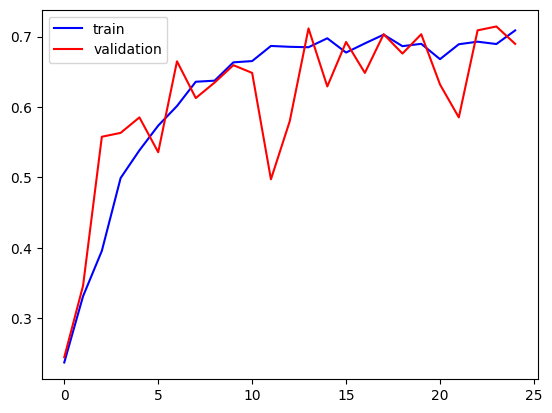

In [19]:
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.show()

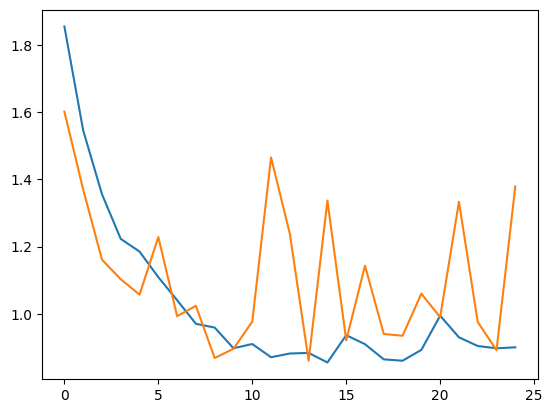

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])